In [841]:
#READ DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

fire_data = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")


In [842]:
# SIZE OF DATA
fire_data.shape

(17442, 7)

In [843]:
fire_data.duplicated().any()

False

In [844]:
fire_data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [845]:
fire_data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [846]:
kerosene = []
gasoline = []
lpg = []
thinner = []

dic = {1: 7, 2: 12, 3: 14, 4:16, 5:20, 6:1, 7:2}

for index, row in fire_data.iterrows():
    if(row['FUEL']) == 'kerosene':
      kerosene.append(dic.get(row['SIZE']))
      gasoline.append(0)
      lpg.append(0)
      thinner.append(0)
    if(row['FUEL']) == 'gasoline':
      kerosene.append(0)
      gasoline.append(dic.get(row['SIZE']))
      lpg.append(0)
      thinner.append(0)
    if(row['FUEL']) == 'thinner':
      kerosene.append(0)
      gasoline.append(0)
      lpg.append(0)
      thinner.append(dic.get(row['SIZE']))
    if(row['FUEL']) == 'lpg':
      kerosene.append(0)
      gasoline.append(0)
      lpg.append(dic.get(row['SIZE']))
      thinner.append(0)

In [847]:
fire_data['KEROSENE'] = kerosene
fire_data['GASOLINE'] = gasoline
fire_data['THINNER'] = thinner
fire_data['LPG'] = lpg
fire_data = fire_data.drop(['FUEL'], axis=1)
fire_data = fire_data.drop(['SIZE'], axis=1)

In [848]:
# TYPES
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTANCE   17442 non-null  int64  
 1   DESIBEL    17442 non-null  int64  
 2   AIRFLOW    17442 non-null  float64
 3   FREQUENCY  17442 non-null  int64  
 4   STATUS     17442 non-null  int64  
 5   KEROSENE   17442 non-null  int64  
 6   GASOLINE   17442 non-null  int64  
 7   THINNER    17442 non-null  int64  
 8   LPG        17442 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.2 MB


In [849]:
# FIRST ROWS EXAMPLE
fire_data.head()

,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,KEROSENE,GASOLINE,THINNER,LPG
0,10,96,0.0,75,0,0,7,0,0
1,10,96,0.0,72,1,0,7,0,0
2,10,96,2.6,70,1,0,7,0,0
3,10,96,3.2,68,1,0,7,0,0
4,10,109,4.5,67,1,0,7,0,0


In [850]:
# ANALYSE DATA
fire_data.describe()

,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,KEROSENE,GASOLINE,THINNER,LPG
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,100.000000,96.379142,6.975634,31.611111,0.497821,4.058824,4.058824,4.058824,0.176471
std,54.773826,8.164096,4.736169,20.939149,0.500010,6.708138,6.708138,6.708138,0.512826
min,10.000000,72.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,90.000000,3.200000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,95.000000,5.800000,27.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,104.000000,11.200000,47.000000,1.000000,7.000000,7.000000,7.000000,0.000000
max,190.000000,113.000000,17.000000,75.000000,1.000000,20.000000,20.000000,20.000000,2.000000


0    8759
1    8683
Name: STATUS, dtype: int64

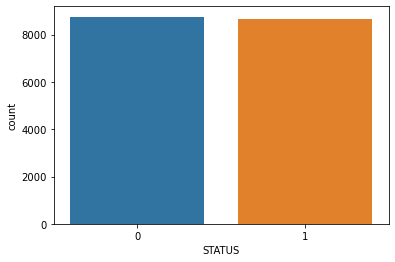

In [851]:
# FIRES EXTINGUISHED
sb.countplot(data=fire_data, x="STATUS")
fire_data['STATUS'].value_counts()

In [852]:
fire_data['GASOLINE'].value_counts() 

0     12312
14     1026
12     1026
7      1026
20     1026
16     1026
Name: GASOLINE, dtype: int64

In [853]:
fire_data['KEROSENE'].value_counts() 

0     12312
14     1026
12     1026
7      1026
20     1026
16     1026
Name: KEROSENE, dtype: int64

In [854]:
fire_data['THINNER'].value_counts() 

0     12312
14     1026
12     1026
7      1026
20     1026
16     1026
Name: THINNER, dtype: int64

190    918
150    918
160    918
50     918
130    918
20     918
100    918
180    918
70     918
40     918
110    918
120    918
10     918
90     918
170    918
60     918
140    918
30     918
80     918
Name: DISTANCE, dtype: int64

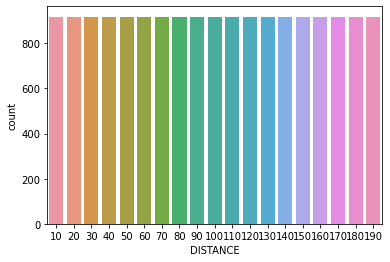

In [855]:
# FUEL USED
sb.countplot(data=fire_data, x="DISTANCE")
fire_data['DISTANCE'].value_counts()

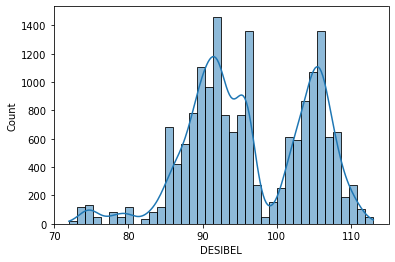

In [856]:
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="DESIBEL", kde=showKDE)

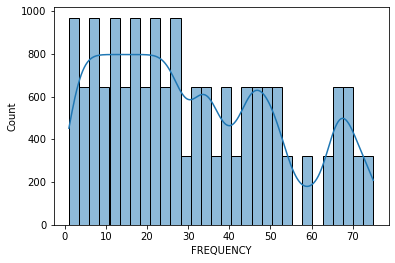

In [857]:
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="FREQUENCY", kde=showKDE)

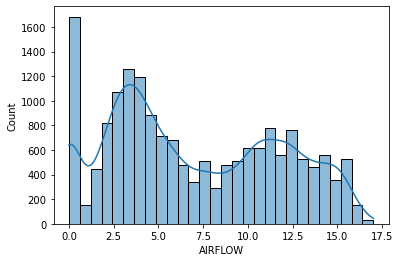

In [858]:
# NUMBER OF TESTS WITH SPECIFIC AIRFLOWS
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="AIRFLOW", kde=showKDE)

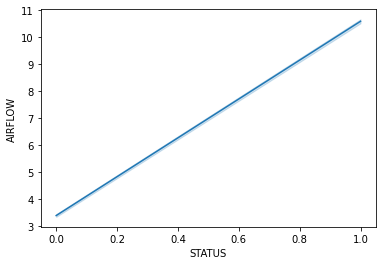

In [859]:
sb.lineplot(data=fire_data, x="STATUS", y="AIRFLOW")
#declive é o mesmo isolando cada tipo de combustivel


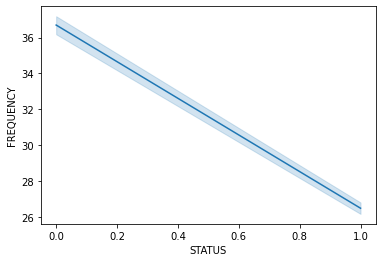

In [860]:
sb.lineplot(data=fire_data, x="STATUS", y="FREQUENCY")

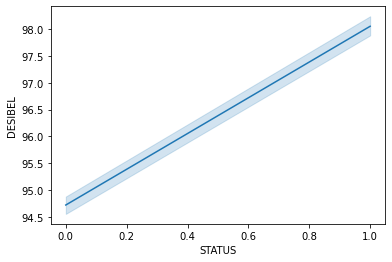

In [861]:
sb.lineplot(data=fire_data, x="STATUS", y="DESIBEL")

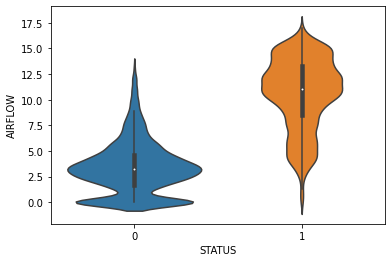

In [862]:
sb.violinplot(data=fire_data, x="STATUS", y="AIRFLOW")

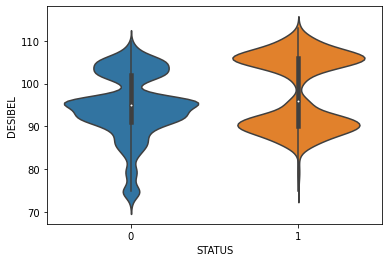

In [863]:
sb.violinplot(data=fire_data, x="STATUS", y="DESIBEL")

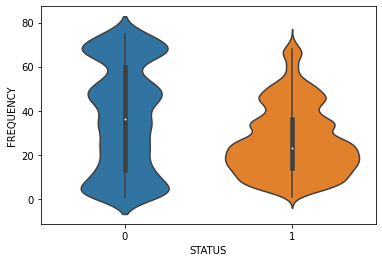

In [864]:
sb.violinplot(x=fire_data["STATUS"], y=fire_data["FREQUENCY"])

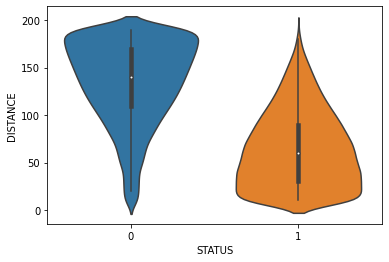

In [865]:
sb.violinplot(x=fire_data["STATUS"], y=fire_data["DISTANCE"])

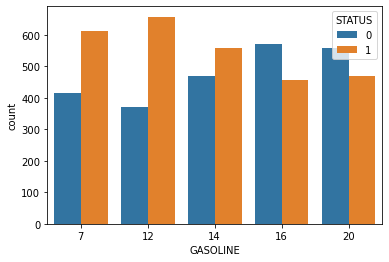

In [866]:
sb.countplot(data=fire_data[fire_data['GASOLINE'] > 0], x="GASOLINE", hue="STATUS")

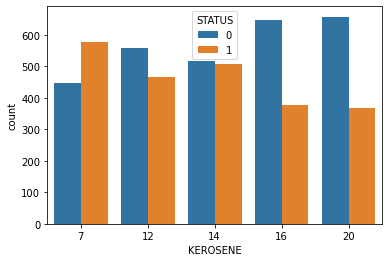

In [867]:
sb.countplot(data=fire_data[fire_data['KEROSENE'] > 0], x="KEROSENE", hue="STATUS")

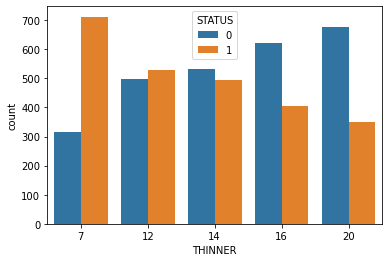

In [868]:
sb.countplot(data=fire_data[fire_data['THINNER'] > 0], x="THINNER", hue="STATUS")

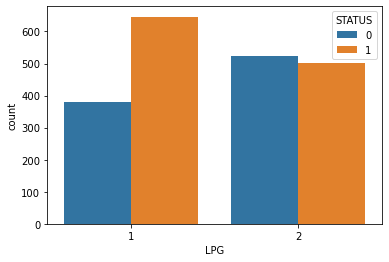

In [869]:
sb.countplot(data=fire_data[fire_data['LPG'] > 0], x="LPG", hue="STATUS")

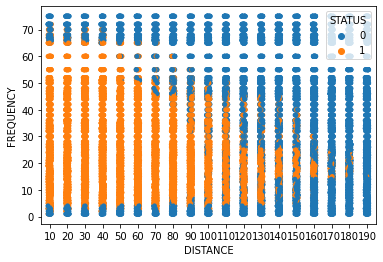

In [870]:
sb.stripplot(data=fire_data, x="DISTANCE", y="FREQUENCY", hue="STATUS")

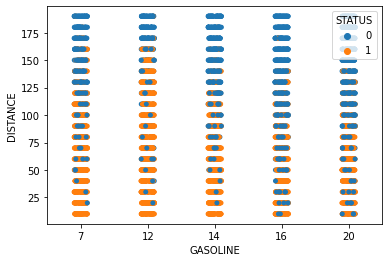

In [871]:
sb.stripplot(data=fire_data[fire_data['GASOLINE'] > 0], x="GASOLINE", y="DISTANCE", hue="STATUS")

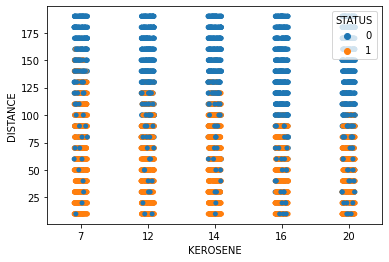

In [872]:
sb.stripplot(data=fire_data[fire_data['KEROSENE'] > 0], x="KEROSENE", y="DISTANCE", hue="STATUS")

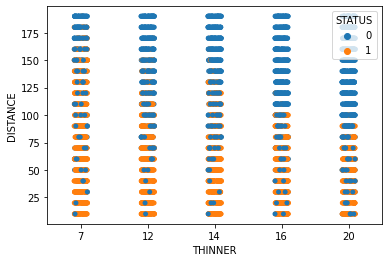

In [873]:
sb.stripplot(data=fire_data[fire_data['THINNER'] > 0], x="THINNER", y="DISTANCE", hue="STATUS")

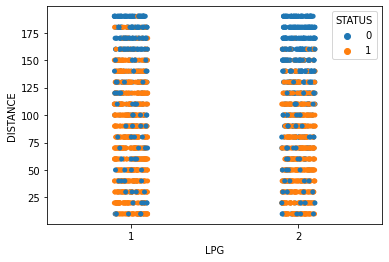

In [874]:
sb.stripplot(data=fire_data[fire_data['LPG'] > 0], x="LPG", y="DISTANCE", hue="STATUS")

In [875]:
#sb.pairplot(fire_data,hue='STATUS')

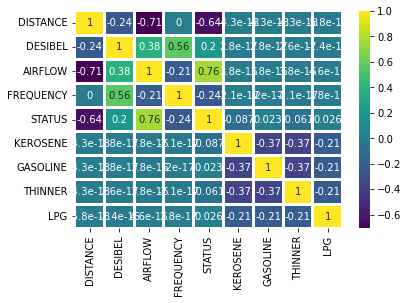

In [876]:
sb.heatmap(fire_data.corr(),annot=True,cmap='viridis',linewidths=2)


In [877]:
np.abs(fire_data.corr()['STATUS']).sort_values().tail(4)

FREQUENCY    0.244203
DISTANCE     0.644051
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64

In [878]:
#Data Modelling 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X=fire_data.drop(['STATUS'],axis=1)
y=fire_data['STATUS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [879]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)

In [880]:
confusion_matrix(y_test,y_pred)

array([[2546,   80],
       [  83, 2524]])

In [881]:
accuracy_score(y_test,y_pred)

0.9688515192050449

In [882]:
#SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test)  


In [883]:
confusion_matrix(y_test,y_pred)

array([[2396,  230],
       [ 287, 2320]])

In [884]:
print(accuracy_score(y_test,y_pred))

0.9012038983374737


In [885]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

accuracy_score(y_test,y_pred)

0.9606344353143512

In [886]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8799923562010319

In [887]:
#Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(X_train,y_train)

y_pred.shape

confusion_matrix(y_test,y_pred)

print(accuracy_score(y_test,y_pred))

0.8799923562010319
